<a href="https://colab.research.google.com/github/archangel2006/PYML-2025/blob/main/PYML11%20(LinearRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#fetch_california_housing is a function in Scikit-learn that loads an open-source housing dataset "California housing dataset”

from sklearn.datasets import fetch_california_housing

In [ ]:
# Call the function

fetch_california_housing()

# Raw structure of the California Housing dataset.
# Dictionary with keys: 'data': feature values (X),'target': house prices (y),
# 'feature_names': column names for X, 'target_names': name of y,'DESCR': dataset description

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing = fetch_california_housing()

# fetch_california_housing() does NOT return a DataFrame directly.
# It returns a Bunch object, which is similar to a dictionary
# This line loads the California Housing dataset from scikit-learn
# Stores it in a variable called housing.

In [ ]:
x = pd.DataFrame(housing.data, columns=housing.feature_names)

# Convert the housing dataset into dataframe, assign column names as the feature names
# Assigns column names using housing.feature_names
# Housing.data:It's a NumPy array containing the feature values (i.e., the input variables X) for each sample.

In [ ]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
x.shape

(20640, 8)

In [ ]:
y = pd.Series(housing.target, name='MedHouseValue')

# This line converts the target values (MEDIAN HOUSE PRICES) from a NumPy array into a pandas Series, and names the column 'MedHouseValue'.
# pd.Series(...): This converts the NumPy array into a pandas Series — a 1D labeled array
# name='MedHouseValue': This gives the Series a label or column name: "MedHouseValue"

In [ ]:
y

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# EXPLORATORY DATA ANALYSIS

In [ ]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
x.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


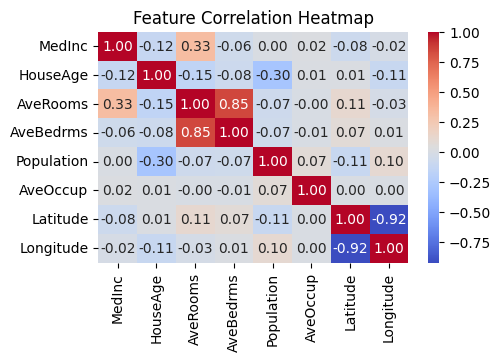

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(x.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# plt.figure(...) → creates a new blank canvas (figure) where you can add plots like histograms, etc.
# figsize=(10, 6) → sets the width=10 and height=6 of the figure in inches:
# cmap stands for color map.
# 'coolwarm':Cool colors (blues) represent low values.Warm colors (reds) represent high values.White or neutral is the center (usually around 0).

Splitting The Data

In [ ]:
from sklearn.model_selection import train_test_split

#  imports the train_test_split function from Scikit-learn’s model_selection module.

In [ ]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# This line splits your dataset into a training set and a testing set,
# train_test_split(...): randomly splits your data.
# The train_test_split() function shuffles the data before splitting into training and test sets.
# random_state=42,Without setting random_state, every run could result in a different split.
# By setting a fixed number like random_state=42, you're telling Python:"Use the same randomness every time so I get consistent results."



In [ ]:
x_test_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [ ]:
x_test_raw.shape

(4128, 8)

In [ ]:
x_train_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
x_train_raw.shape

(16512, 8)

In [ ]:
type(x_train_raw)

#A DataFrame is a 2-dimensional labeled data structure.
#data type (class) of the variable X_train_raw.

pandas.core.frame.DataFrame

In [ ]:
y_train

,MedHouseValue
14196,1.030
8267,3.821
17445,1.726
14265,0.934
2271,0.965
...,...
11284,2.292
11964,0.978
5390,2.221
860,2.835


In [ ]:
y_train.shape

(16512,)

In [ ]:
y_test

,MedHouseValue
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [ ]:
type(y_test)

pandas.core.series.Series

# Pre Processing

# Feature Scaling (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# The California Housing dataset has features with very different value ranges:
# Features with larger values (like Population) could dominate the learning process, even if they're less important.


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_raw)
x_test = scaler.transform(x_test_raw)

#StandardScaler → Class:A class is like a blueprint — it defines how a scaler should behave,
# what methods it has (fit, transform, etc.)
#scaler → Object (or instance)
#This is the object (also called an instance) that you create from the class
#scaler.fit_transform:"Learn the mean and standard deviation of each feature in X,
#then scale the data so that each feature has mean = 0 and standard deviation = 1."

Train Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

#This line imports the LinearRegression class from Scikit-learn's linear_model module.

In [ ]:
# INitialize & Train the Model
reg = LinearRegression()
reg.fit(x_train, y_train)

#This creates a LinearRegression model object.
#This trains (or "fits") the model on your training data.
#It uses X_train (input features) and y_train (target/labels).
#Behind the scenes, it uses Ordinary Least Squares (OLS) to find the best weights:
#model.coef_ → the learned coefficients,model.intercept_ → the learned intercept (bias)

LinearRegression()

Prediction


In [ ]:
# PRedict

y_pred = reg.predict(x_test)

#This line uses trained linear regression model to predict the target values (house prices) for the test set X_test.

In [ ]:
x_test

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

In [ ]:
x_test.shape

(4128, 8)

In [ ]:
y_pred

#is the array of values predicted by your model for the test dataset.

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

Evaluation Using Performance Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

#importing key metrics to evaluate the performance of your regression model:

In [ ]:
mse = mean_squared_error(y_test,y_pred)
round(mse,4)
#Calculates the average squared difference between actual (y_true) and predicted (y_pred) values.
#Lower is better
#Rounds the Mean Squared Error to 4 decimal places.

0.5559

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
round(mae,4)

#Calculates the average of the absolute differences between actual and predicted values.
#Lower is better


0.5332

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

#Measures how well your model explains the variance in the target.
#Ranges from –∞ to 1:
#1.0 = perfect prediction
#0.0 = model is no better than predicting the mean
#good model:Closer to 1

0.5758

In [ ]:
#Create a comparison table: original features + actual + predicted values
results_df = x_test_raw.copy()
results_df['Actual_MedHouseValue'] = y_test.values
results_df['Predicted_MedHouseValue'] = y_pred
print("\n🔍Sample Prediction Results:")
print(results_df.head())

#results_df is a completely separate DataFrame.
#.copy():Any changes to results_df will not affect X_test_raw.
#This converts the pandas Series into a NumPy array.Pandas series is 1-D labelled aray and NumPy Array is 1D or multi-dimensional unlabeled array
#pandas series has indexes too so,It removes the index/label metadata and gives just the raw numerical data.
#y_pred is already array


🔍Sample Prediction Results:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   

       Longitude  Actual_MedHouseValue  Predicted_MedHouseValue  
20046    -119.01               0.47700                 0.719123  
3024     -119.46               0.45800                 1.764017  
15663    -122.44               5.00001                 2.709659  
20484    -118.72               2.18600                 2.838926  
9814     -121.93               2.78000                 2.604657  
